<a href="https://colab.research.google.com/github/Ashad001/ML-DL-Projects/blob/project/HousePricePrediction/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: xlabel='LotArea', ylabel='SalePrice'>

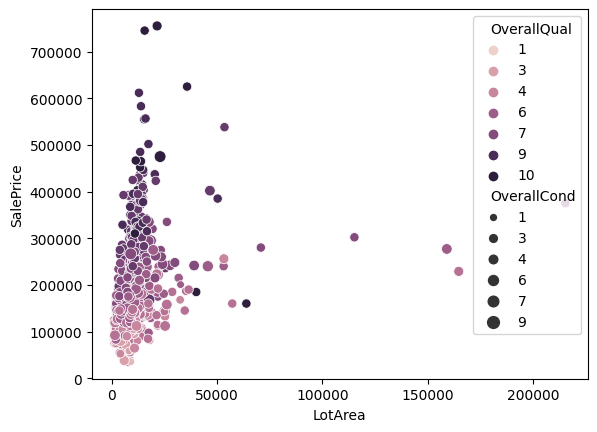

In [ ]:
sns.scatterplot(data=data, x='LotArea', y='SalePrice', hue='OverallQual', size='OverallCond')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train_X = data.drop(['SalePrice'], axis = 1)
train_Y = data['SalePrice']
train_X.shape, train_Y.shape

((1460, 80), (1460,))

<Axes: >

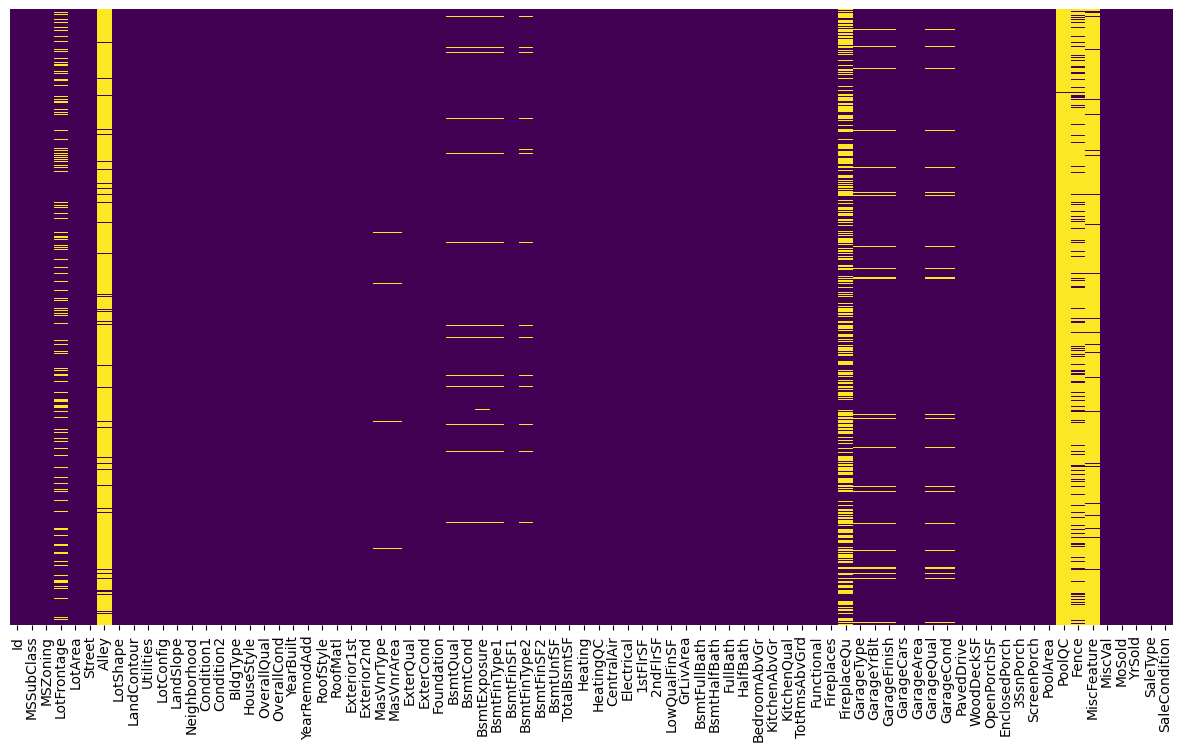

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_X.isnull(), yticklabels=False, cbar=False, cmap='viridis')

70.04995836802665


<Axes: >

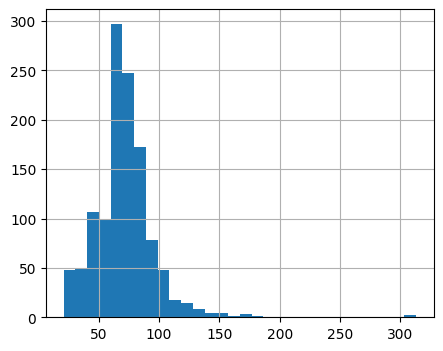

In [ ]:
print(train_X['LotFrontage'].mean())
train_X['LotFrontage'].hist(figsize=(5, 4), bins = 30)

In [ ]:
def imputer(x):
  x['LotFrontage'] = x['LotFrontage'].fillna(x['LotFrontage'].mean())
  x['BsmtFinSF1'] = x['BsmtFinSF1'].fillna(x['BsmtFinSF1'].mean())
  x['BsmtFinSF2'] = x['BsmtFinSF2'].fillna(x['BsmtFinSF2'].mean())
  x['GarageArea'] = x['GarageArea'].fillna(x['GarageArea'].mean())
  x['TotalBsmtSF'] = x['TotalBsmtSF'].fillna(x['TotalBsmtSF'].mean())
  x['BsmtUnfSF'] = x['BsmtUnfSF'].fillna(x['BsmtUnfSF'].mean())
  x['MasVnrType'] = x['MasVnrType'].fillna(x['MasVnrType'].mode()[0])
  x['MasVnrArea'] = x['MasVnrArea'].fillna(x['MasVnrArea'].mean())
  x['BsmtQual'] = x['BsmtQual'].fillna(x['BsmtQual'].mode()[0])
  x['BsmtCond'] = x['BsmtCond'].fillna(x['BsmtCond'].mode()[0])
  x['BsmtFinType1'] = x['BsmtFinType1'].fillna(x['BsmtFinType1'].mode()[0])
  x['BsmtFinType2'] = x['BsmtFinType2'].fillna(x['BsmtFinType2'].mode()[0])
  x['BsmtExposure'] = x['BsmtExposure'].fillna(x['BsmtExposure'].mode()[0])
  x['GarageQual'] = x['GarageQual'].fillna(x['GarageQual'].mode()[0])
  x['GarageCond'] = x['GarageCond'].fillna(x['GarageCond'].mode()[0])
  x['Electrical'] = x['Electrical'].fillna(x['Electrical'].mode()[0])
  x['BsmtFullBath'] = x['BsmtFullBath'].fillna(x['BsmtFullBath'].mode()[0])
  x['BsmtHalfBath'] = x['BsmtHalfBath'].fillna(x['BsmtHalfBath'].mode()[0])
  x['GarageYrBlt'] = x['GarageYrBlt'].fillna(x['GarageYrBlt'].mode()[0])
  x['GarageCars'] = x['GarageCars'].fillna(x['GarageCars'].mode()[0])
  x['GarageYrBlt'] = x['GarageYrBlt'].fillna(x['GarageYrBlt'].mode()[0])
  x['GarageFinish'] = x['GarageFinish'].fillna(x['GarageFinish'].mode()[0])
  x['GarageType'] = x['GarageType'].fillna(x['GarageType'].mode()[0])
  return x

In [ ]:
def featureDropper(x):
  x = x.drop(['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
  return x

In [ ]:
train_X[train_X.select_dtypes(include=['object']).columns]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
import pandas as pd

def Encoder(x):
    cat_cols = x.select_dtypes(include=['object']).columns
    encoded_cols = pd.get_dummies(x[cat_cols], columns=cat_cols, prefix=cat_cols)
    x = x.drop(cat_cols, axis=1)
    x = x.join(encoded_cols)
    features = [x for x in x.columns if x != 'SalePrice']
    print(features)
    return x


In [ ]:
def pipeline(x):
  x = featureDropper(x)
  x = imputer(x)
  x = Encoder(x)
  return x

In [ ]:
train_X = pipeline(train_X)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_B

In [ ]:
train_X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
train_X.shape, train_Y.shape

((1460, 270), (1460,))

<Axes: >

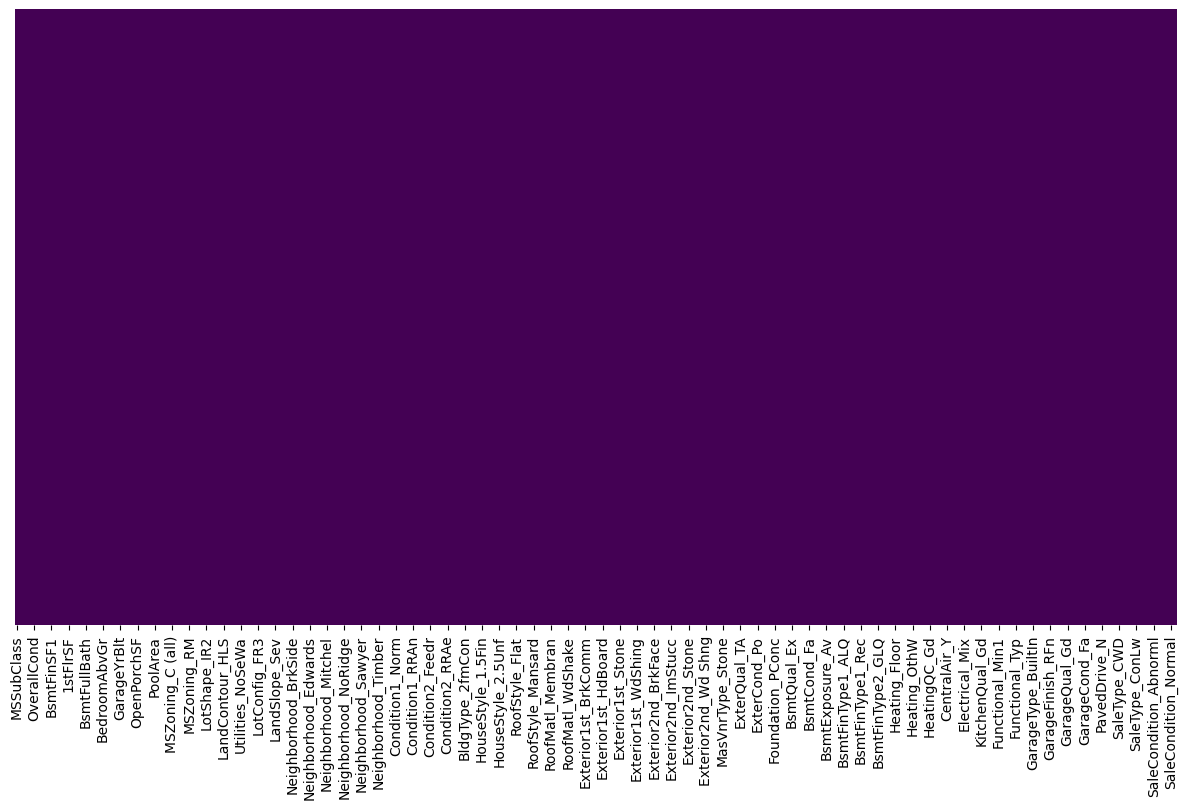

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_X.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [ ]:
train_X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 270 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(234)
memory usage: 744.4 KB


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(train_X, train_Y, test_size = 0.20, random_state=42)
X_train.shape, Y_train.shape,  X_test.shape, Y_test.shape

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=5, subsample=0.8, colsample_bytree=0.8)
model.fit(X_train, Y_train)

model.score(X_train, Y_train)

In [ ]:
model.score(X_test, Y_test)

In [ ]:
y_hat = model.predict(X_test)
rmse = mean_squared_error(Y_test, y_hat)
print(f"RMSE: {rmse:.2f}")

RMSE: 815021113.41


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 500)
forest.fit(X_train,Y_train)
forest.score(X_test, Y_test)

In [ ]:
y_hat = forest.predict(X_test)
rmse = mean_squared_error(Y_test, y_hat)
print(f"RMSE: {rmse:.2f}")
y_hat[:5], Y_test[:5]

In [ ]:
test_data = pd.read_csv('test.csv')
test_data.head()

In [ ]:
mode_values = data[['HouseStyle', 'Exterior1st', 'RoofMatl', 'Condition2', 'Heating', 'Exterior2nd', 'Utilities', 'GarageQual']].mode().iloc[0]

for feature in mode_values.index:
    if feature in test_data.columns:
        test_data[feature] = test_data[feature].fillna(mode_values[feature])
    else:
        test_data[feature] = mode_values[feature]


In [ ]:
test_data['Heating']

In [ ]:
test_data = pipeline(test_data)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhoo

In [ ]:
print(set(train_X) - set(test_data))

{'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'RoofMatl_Roll', 'Electrical_Mix', 'Condition2_RRAn', 'Heating_OthW', 'Condition2_RRAe', 'Heating_Floor', 'Condition2_RRNn', 'Exterior2nd_Other', 'RoofMatl_Metal', 'Utilities_NoSeWa', 'GarageQual_Ex'}


<Axes: >

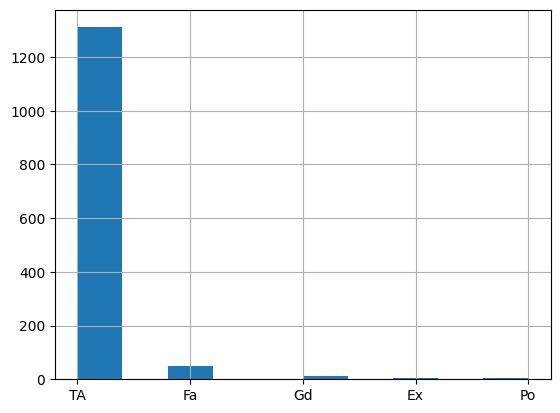

In [ ]:
data['GarageQual'].hist()

<Axes: >

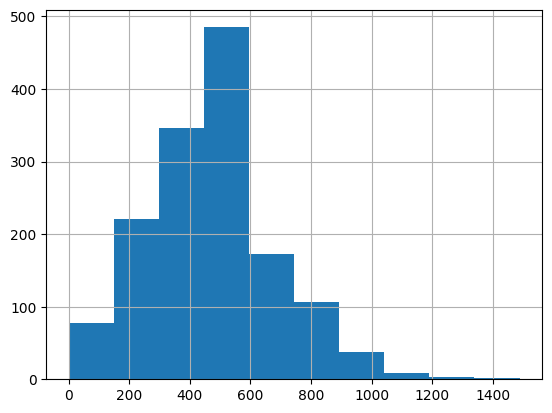

In [ ]:
test_data['GarageArea'].hist()

In [ ]:
test_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0
